<a href="https://colab.research.google.com/github/AntoniCrous/Aprndizaje_No_Supervisado-Trabajo/blob/master/Agrupamiento_Mean_Shift_Ag4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento por Densidad: Meanshift

Este algoritmo se basa en mediante definir candidatos a centroides sindo la media de los puntos del clúster.

In [0]:
#Cargamos las librerias necessarias
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

##Dataset 1 Conocido

El dataset 1 el qual conocemos las classes tiene 1999 instancias.


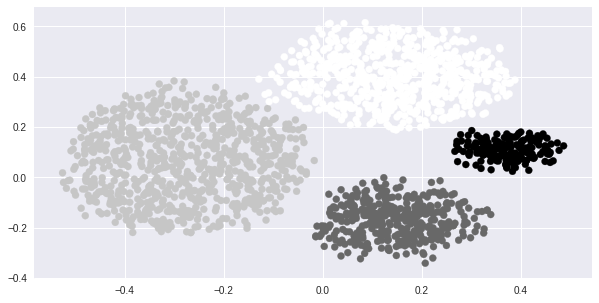

In [196]:
#Cargamos y Mostramos el dataset 1
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_medida.csv'
D1 = np.array(pd.read_csv(data_file_url,header=0))
D1 = D1[ np.random.choice(np.arange(D1.shape[0]), D1.shape[0], replace=False) ,:]
D1x = D1[:,0:2]
D1y = D1[:,2]
print('El dataset 1 el qual conocemos las classes tiene',D1y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1y)

#### Conocido
Auque sea conocido debemos encontrar un valor d h adequado para el dataset

Text(0, 0.5, 'Medida de R cuadrado')

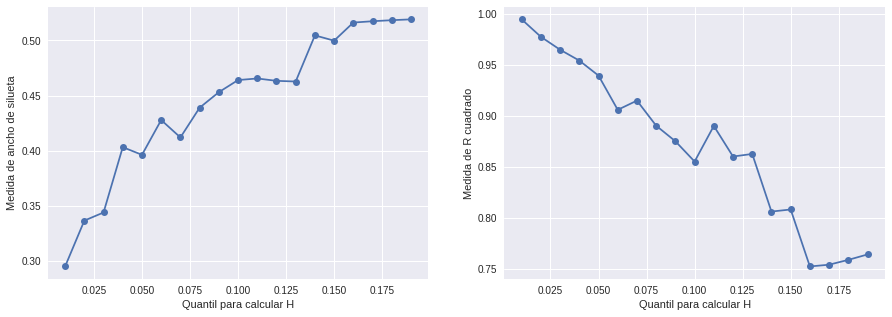

In [198]:
from sklearn.metrics import silhouette_score

def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    
    return (sumTotal-interior)/sumTotal

rang = np.arange(0.01,0.2,0.01)

rsilueta = np.zeros(rang.size)
rrsquare = np.zeros(rang.size)
I = 0
for k in rang:
    h = estimate_bandwidth(D1x, quantile=k, n_samples=500)
    ms = MeanShift(bandwidth=h, bin_seeding=True)
    ms.fit(D1x)
    cD1x_sk = ms.cluster_centers_
    D1yp_sk = ms.labels_
    rsilueta[I] = silhouette_score(D1x, D1yp_sk)
    rrsquare[I]  = medida_R_cuadrado(D1x, D1yp_sk, cD1x_sk)
    I+= 1
    
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( rang,rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Quantil para calcular H")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( rang,rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Quantil para calcular H")
ax[1].set_ylabel("Medida de R cuadrado")

Vemos que quantile igual a 0.14 es el punto intermedio que mejora las dos medidas escogidas.

h =  0.18454717110992375


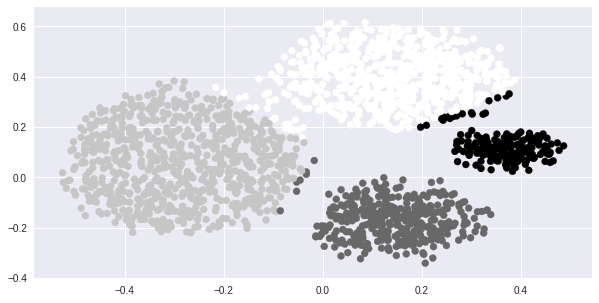

In [194]:
bandwidth = estimate_bandwidth(D1x, quantile=0.14, n_samples=500)
print ('h = ', bandwidth)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(D1x)
D1y = ms.labels_
cluster_centers = ms.cluster_centers_

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1y)

## Conclusiones
Puesto que conocemos el dataset vemos que no acaba de definir bien las fronteras entre los clústers. Este no seria un algoritmo adequado para este dataset.

##Dataset 2  No Conocido

El dataset 2 el qual conocemos las classes tiene 2000 instancias.


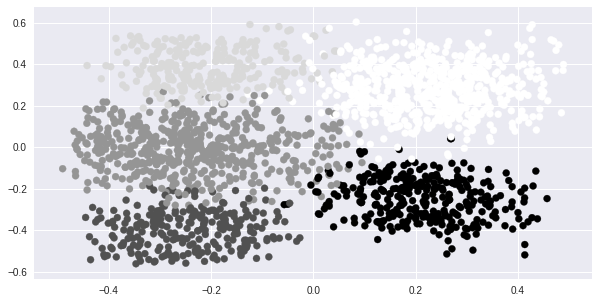

In [199]:
#Cargamos y Mostramos el dataset 2
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_inseparable.csv'
D2 = np.array(pd.read_csv(data_file_url,header=0))
D2 = D2[ np.random.choice(np.arange(D2.shape[0]), D2.shape[0], replace=False) ,:]
D2x = D2[:,0:2]
D2y = D2[:,2]
print('El dataset 2 el qual conocemos las classes tiene',D2y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2y)

#### Dataset No Conocido
Como no conocemos el numero de clusters debemos usar metricas para encontrar el numero de k que maximize la dispersión iterclúster y minimize la dispersión intraclúster.

Text(0, 0.5, 'Medida de R cuadrado')

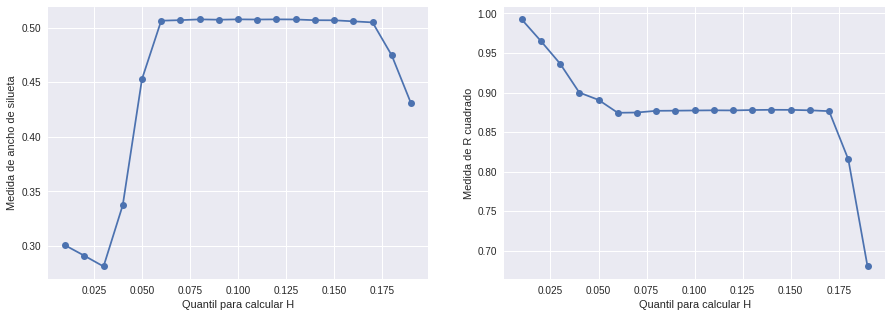

In [200]:
from sklearn.metrics import silhouette_score

def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    
    return (sumTotal-interior)/sumTotal

rang = np.arange(0.01,0.2,0.01)

rsilueta = np.zeros(rang.size)
rrsquare = np.zeros(rang.size)
I = 0
for k in rang:
    h = estimate_bandwidth(D2x, quantile=k, n_samples=500)
    ms = MeanShift(bandwidth=h, bin_seeding=True)
    ms.fit(D2x)
    cD2x_sk = ms.cluster_centers_
    D2yp_sk = ms.labels_
    rsilueta[I] = silhouette_score(D2x, D2yp_sk)
    rrsquare[I]  = medida_R_cuadrado(D2x, D2yp_sk, cD2x_sk)
    I+= 1
    
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( rang,rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Quantil para calcular H")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( rang,rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Quantil para calcular H")
ax[1].set_ylabel("Medida de R cuadrado")

Vemos que quantile igual a 0.07 es el punto intermedio que mejora las dos medidas escogidas.

h =  0.1403657241996073


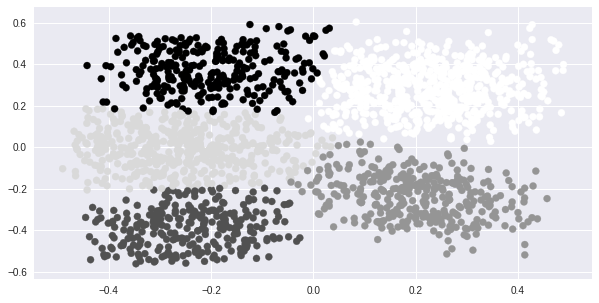

In [201]:
bandwidth = estimate_bandwidth(D2x, quantile=0.07, n_samples=500)
print('h = ', bandwidth)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(D2x)
D1y = ms.labels_
cluster_centers = ms.cluster_centers_

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D1y)

## Conclusiones
Puesto que no conocemos el dataset no podemos decir que es el agrupamiento correcto sin embargo parece un comportamiento bastante adequado ya que separa las aglomeraciones mas densas.